In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

In [20]:
DATA_PATH = './data/'

# Tables

## Table 1
Cluster Demographics (Not complete)

Cluster | Districts | # of Households (Baskets)

## Table 2
Table 2 in thesis

## Table 3
Table 4 in thesis, 
Needs:
- Min. Pulse, millet, etc..
- Clinical Level

## Table 4
Table 5/6 in thesis, correlation (cross-crop and regional)

## Table 5
Table 7 in thesis, Costs incurred by gov't (CPLEX output)

# Figures
*Note:* Shapefiles from https://github.com/datameet/maps/tree/master/Survey-of-India-Index-Maps/Boundaries

## Figure 1
Preference Visualization

In [21]:
Q = pd.read_csv(DATA_PATH + 'Q_interstate.csv')

## 2a. Staple Preferences

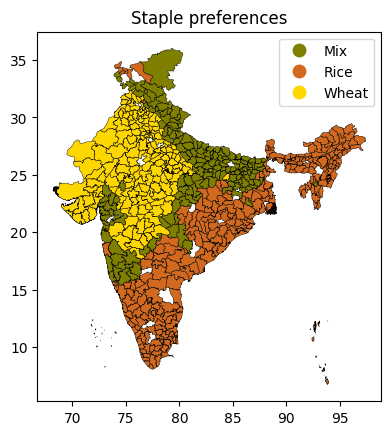

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load cluster info into dataframe
data = pd.read_csv('../cplex/data/clusters.csv')

# Load the shapefile
gdf = gpd.read_file('data/shapefiles/india.shp')

# Change the column name in the geodataframe to match consumption
gdf.rename(columns={'DISTRICT': 'District'}, inplace=True)

# Merge the geodataframe with the cluster data
merged_gdf = gdf.merge(data, left_on='District', right_on='District')

# Define a custom color map
color_map = ListedColormap(['olive', 'chocolate', 'gold'])

# Plot the regions colored by 'Staple' column
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column='Staple', cmap=color_map, linewidth=0.3, ax=ax,  edgecolor='black', legend=True)

plt.title('Staple preferences')
plt.show()

## 2b. Surplus and Deficit Map

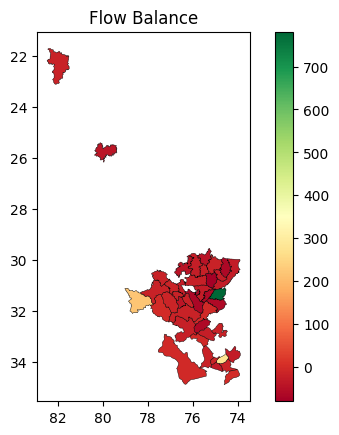

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read data
geo_data = pd.read_csv("../data/consumption.csv")[['District', 'Latitude', 'Longitude']][:46]
exports = pd.read_csv("data/Q_Interstate.csv", header=None, names=['from', 'to', 'crop', 'quantity'])
imports = pd.read_csv("data/S_Interstate.csv", header=None, names=['from', 'to', 'crop', 'quantity'])

# Group exports and imports
grouped_exports = exports.groupby('from')['quantity'].sum()
grouped_imports = imports.groupby('to')['quantity'].sum()

# Calculate flow_balance
flow_balance = grouped_exports.sub(grouped_imports, fill_value=0)

# Merge flow_balance with geo_data
merged_data = geo_data.merge(flow_balance.reset_index(), left_index=True, right_on='from', how='left')
merged_data.fillna(0, inplace=True)
merged_data.rename(columns={'quantity': 'flow_balance'}, inplace=True)

# Load the shapefile
gdf = gpd.read_file('data/shapefiles/districts.shp')

# Change the column name in the geodataframe to match consumption
gdf.rename(columns={'DISTRICT': 'District'}, inplace=True)

# Merge the geodataframe with the flow balance data
merged_gdf = gdf.merge(merged_data, left_on='District', right_on='District')

# Plot the regions colored by 'flow_balance' column
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column='flow_balance', cmap='RdYlGn', linewidth=0.3, ax=ax, edgecolor='black', legend=True)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Flow Balance')
plt.show()

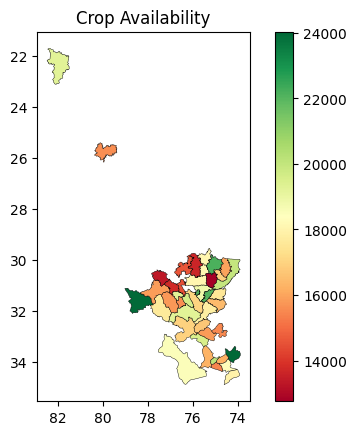

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read data
geo_data = pd.read_csv("../data/consumption.csv")[['District', 'Latitude', 'Longitude']][:46]
available = pd.read_csv("data/crop_availability.csv", header=None, names=['district', 'crop', 'quantity'])

# Subtract 1 from 'district' column to match with zero-indexed geo_data
available['district'] = available['district'] - 1

# Group availability by district
grouped_available = available.groupby('district')['quantity'].sum()

# Reset index of geo_data
geo_data.reset_index(inplace=True)
geo_data.rename(columns={'index': 'district'}, inplace=True)

# Merge availability with geo_data
merged_data = geo_data.merge(grouped_available.reset_index(), on='district', how='left')
merged_data.fillna(0, inplace=True)
merged_data.rename(columns={'quantity': 'availability'}, inplace=True)

# Load the shapefile
gdf = gpd.read_file('data/shapefiles/districts.shp')

# Change the column name in the geodataframe to match consumption
gdf.rename(columns={'DISTRICT': 'District'}, inplace=True)

# Merge the geodataframe with the availability data
merged_gdf = gdf.merge(merged_data, on='District')

# Plot the regions colored by 'availability' column
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column='availability', cmap='RdYlGn', linewidth=0.3, ax=ax, edgecolor='black', legend=True)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Crop Availability')
plt.show()

## 2c. Cluster Map

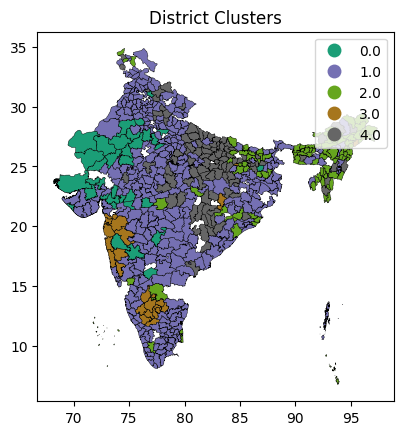

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import difflib

# Load cluster info into dataframe
data = pd.read_csv('../cplex/data/clusters.csv')

# Load the shapefile
gdf = gpd.read_file('data/shapefiles/districts.shp')

# Create a dictionary to store the closest matches
matches = {}

# Find closest matches for district names in data
for district in data['District']:
    best_match = difflib.get_close_matches(district, gdf['DISTRICT'].values, n=1, cutoff=0.8)
    if best_match:
        matches[district] = best_match[0]

# Replace district names in data with the closest matches
data['District'] = data['District'].map(matches).fillna(data['District'])

# Change the column name in the geodataframe to match consumption
gdf.rename(columns={'DISTRICT': 'District'}, inplace=True)

# Merge the geodataframe with the cluster data
merged_gdf = gdf.merge(data, left_on='District', right_on='District', how='left')

merged_gdf['Cluster'] = merged_gdf['Cluster'].astype('category')

# Plot the regions colored by 'Cluster' column
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column='Cluster', cmap='Dark2', linewidth=0.3, ax=ax, edgecolor='black', legend=True)
plt.title('District Clusters')
plt.show()

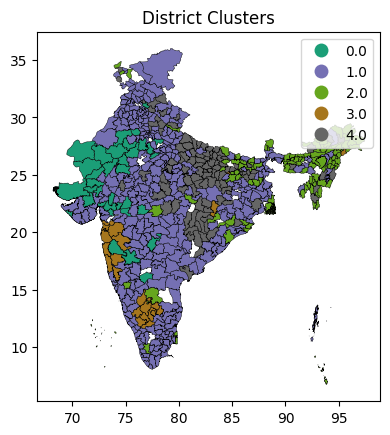

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import difflib

# Load cluster info into dataframe
data = pd.read_csv('../cplex/data/clusters.csv')

# Load the shapefile
gdf = gpd.read_file('data/shapefiles/india.shp')

# Create a dictionary to store the closest matches
matches = {}

# Find closest matches for district names in data
for district in data['District']:
    best_match = difflib.get_close_matches(district, gdf['DISTRICT'].values, n=1, cutoff=0.8)
    if best_match:
        matches[district] = best_match[0]

# Replace district names in data with the closest matches
data['District'] = data['District'].map(matches).fillna(data['District'])

# Change the column name in the geodataframe to match consumption
gdf.rename(columns={'DISTRICT': 'District'}, inplace=True)

# Merge the geodataframe with the cluster data
merged_gdf = gdf.merge(data, left_on='District', right_on='District', how='left')

merged_gdf['Cluster'] = merged_gdf['Cluster'].astype('category')

# Plot the regions colored by 'Cluster' column
fig, ax = plt.subplots(1, 1)
merged_gdf.plot(column='Cluster', cmap='Dark2', linewidth=0.3, ax=ax, edgecolor='black', legend=True)
plt.title('District Clusters')
plt.show()

## Figure 2d.
Visualization of sold_to_gov't


In [26]:
gdf = gpd.read_file('data/shapefiles/india.shp')
data = pd.read_csv('../cplex/data/clusters.csv')

data = data.sort_values(by='District')

i = 0

# Check for districts in data but not in gdf
for idx, district in enumerate(data['District']):
    if district not in gdf['DISTRICT'].values:
        print(f"Index {idx}: {district} not in map dataset.")

print('\n\n')

# Check for districts in gdf but not in data
for district in gdf['DISTRICT'].unique():
    if district not in data['District'].values:
        print(f"{district} not in pds dataset.")

Index 98: Chamarajanagar not in map dataset.
Index 123: Cuddapah not in map dataset.
Index 130: Dantewada* not in map dataset.
Index 138: Dehradun not in map dataset.
Index 166: East Delhi not in map dataset.
Index 212: Guwahati not in map dataset.
Index 222: Hathras not in map dataset.
Index 229: Howrah not in map dataset.
Index 296: Kawardha not in map dataset.
Index 395: Nainital not in map dataset.
Index 409: Nawanshahr not in map dataset.
Index 416: North Cachar Hills not in map dataset.
Index 424: North and Middle Andamans not in map dataset.
Index 449: Pondicherry not in map dataset.
Index 503: Saran not in map dataset.
Index 506: Sawai not in map dataset.
Index 538: Sonapur not in map dataset.



Bandipore not in pds dataset.
Central not in pds dataset.
Chamrajanagar not in pds dataset.
Y.s.r. not in pds dataset.
Dakshin Bastar Dantewada not in pds dataset.
Data Not Available not in pds dataset.
East not in pds dataset.
Ganderbal not in pds dataset.
Haora not in pds dataset.
Ma

## Figure 3
Basket composition
(Horizontal bars, showing proportions. See Thesis)

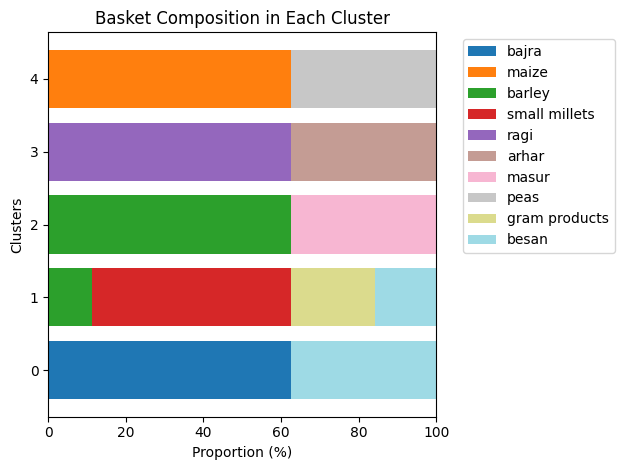

In [27]:
# Load your data from the CSV file
data = pd.read_csv("../cplex/data/basket_contents.csv")
data = data[:6]

# Set districts as index
data = data.set_index("cluster")

# Calculate total food per district
data["total_food"] = data.sum(axis=1)

# Normalize data (proportions) for each district
data_norm = data.iloc[:, :-1].div(data["total_food"], axis=0) * 100 

# Remove columns that do not contribute to any cluster
data_norm = data_norm.loc[:, (data_norm != 0).any(axis=0)]

# Get max total food for setting bar width
max_total_food = data["total_food"].max()

# Define color mapping
cmap = plt.get_cmap('tab20')  # This colormap has a unique color for each value between 0 and 1
colors = [cmap(i/(len(data_norm.columns)-1)) for i in range(len(data_norm.columns))]

def create_stacked_bar(data_norm, max_total_food, colors):
    bars = []
    for (i, (district_name, district_data)) in enumerate(data_norm.iterrows()):
        bar_start = 0
        for j, crop_amount in enumerate(district_data):
            bars.append(plt.barh(i, crop_amount, left=bar_start, color=colors[j]))
            bar_start += crop_amount
    return bars

# Create stacked bars and labels
bars = create_stacked_bar(data_norm, max_total_food, colors)

# Set labels and title
plt.xlabel("Proportion (%)")
plt.ylabel("Clusters")
plt.title("Basket Composition in Each Cluster")

# Set legend labels (adjusted to exclude zero-sum columns) and move it to the right
plt.legend([bar[0] for bar in bars], data_norm.columns, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## Figure 4
Procurement Map